In [116]:
!pip install bagpy
!pip install pyproj
from IPython.display import clear_output
clear_output()

In [117]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sys
from scipy import stats
import random
import pyproj
from scipy.optimize import curve_fit
from numpy import arange

In [3]:
#reading the data from bag file and converting into the panda data frame librabry
# movbgfree=bagreader('/home/abhinav/catkin_ws/src/LAB2/src/data/walking_data.bag')
# statbgfree=bagreader('/home/abhinav/catkin_ws/src/LAB2/src/data/stationary_data.bag')
# movbgoccl=bagreader('/home/abhinav/catkin_ws/src/LAB2/src/data/walking_data.bag')
# statbgoccl=bagreader('/home/abhinav/catkin_ws/src/LAB2/src/data/stationary_data_afternoon.bag')

movbgfree=bagreader('walking_open.bag')
statbgfree=bagreader('stat_open_10_min.bag')

movbgoccl=bagreader('walking_occ.bag')
statbgoccl=bagreader('stat_occ.bag')

movfree = movbgfree.message_by_topic('/gps')
statfree = statbgfree.message_by_topic('/gps')

movoccl = movbgoccl.message_by_topic('/gps')
statoccl = statbgoccl.message_by_topic('/gps')

[INFO]  Successfully created the data folder walking_open.
[INFO]  Successfully created the data folder stat_open_10_min.
[INFO]  Successfully created the data folder walking_occ.
[INFO]  Successfully created the data folder stat_occ.


In [95]:
df_movefree = pd.read_csv('walking_open/gps.csv')
df_statfree = pd.read_csv('stat_open_10_min/gps.csv')

df_moveoccl = pd.read_csv('walking_occ/gps.csv')
df_statoccl = pd.read_csv('stat_occ/gps.csv')

In [96]:
print(df_statfree.shape, df_statoccl.shape, df_movefree.shape, df_statfree.shape)

(710, 15) (635, 15) (100, 15) (710, 15)


In [97]:
df_movefree.keys().tolist()
print(df_moveoccl.keys().tolist())

['Time', 'Header.seq', 'Header.stamp.secs', 'Header.stamp.nsecs', 'Header.frame_id', 'Latitude', 'Longitude', 'fix_quality', 'Altitude', 'HDOP', 'UTM_easting', 'UTM_northing', 'UTC', 'Zone', 'Letter']


In [132]:
df_moveoccl.tail()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,fix_quality,Altitude,HDOP,UTM_easting,UTM_northing,UTC,Zone,Letter
91,1.676923e+09,93,68349,0,GPS1_Frame,42.338959,-71.086907,4,19.299999,0.72,3.280840,46.895208,19:58:48,19,T
92,1.676923e+09,94,68350,0,GPS1_Frame,42.338955,-71.086917,4,19.299999,0.72,3.280831,46.895204,19:58:49,19,T
93,1.676923e+09,95,68351,0,GPS1_Frame,42.338952,-71.086922,4,19.299999,0.72,3.280828,46.895200,19:58:50,19,T
94,1.676923e+09,96,68352,0,GPS1_Frame,42.338951,-71.086921,4,19.299999,0.72,3.280828,46.895198,19:58:51,19,T
95,1.676923e+09,97,68353,0,GPS1_Frame,42.338949,-71.086919,4,19.299999,0.72,3.280830,46.895197,19:58:52,19,T


In [99]:
my_gps_data_utm_e = df_movefree.UTM_easting.to_numpy()
my_gps_data_utm_n = df_movefree.UTM_northing.to_numpy()
my_gps_data_utm_t = df_movefree['Header.stamp.secs'].to_numpy()

my_gps_data_utm_e1 = df_moveoccl.UTM_easting.to_numpy()
my_gps_data_utm_n1 = df_moveoccl.UTM_northing.to_numpy()
my_gps_data_utm_t1 = df_moveoccl['Header.stamp.secs'].to_numpy()

my_gps_data_utm_e2 = df_statfree.UTM_easting.to_numpy()
my_gps_data_utm_n2 = df_statfree.UTM_northing.to_numpy()
my_gps_data_utm_t2 = df_statfree['Header.stamp.secs'].to_numpy()

my_gps_data_utm_e3 = df_statoccl.UTM_easting.to_numpy()
my_gps_data_utm_n3 = df_statoccl.UTM_northing.to_numpy()
my_gps_data_utm_t3 = df_statoccl['Header.stamp.secs'].to_numpy()

In [100]:
for every_element in range (0,len(my_gps_data_utm_e)):
   my_gps_data_utm_e[every_element] = my_gps_data_utm_e[every_element]/100000
for every_element in range (0,len(my_gps_data_utm_n)):
  my_gps_data_utm_n[every_element] = my_gps_data_utm_n[every_element]/100000
for every_element in range (0,len(my_gps_data_utm_t)):
  my_gps_data_utm_t[every_element] = my_gps_data_utm_t[every_element] - 1172

for every_element in range (0,len(my_gps_data_utm_e1)):
   my_gps_data_utm_e1[every_element] = my_gps_data_utm_e1[every_element]/100000
for every_element in range (0,len(my_gps_data_utm_n1)):
  my_gps_data_utm_n1[every_element] = my_gps_data_utm_n1[every_element]/100000
for every_element in range (0,len(my_gps_data_utm_t1)):
  my_gps_data_utm_t1[every_element] = my_gps_data_utm_t1[every_element] - 3579

In [ ]:
my_gps_data_utm_n3

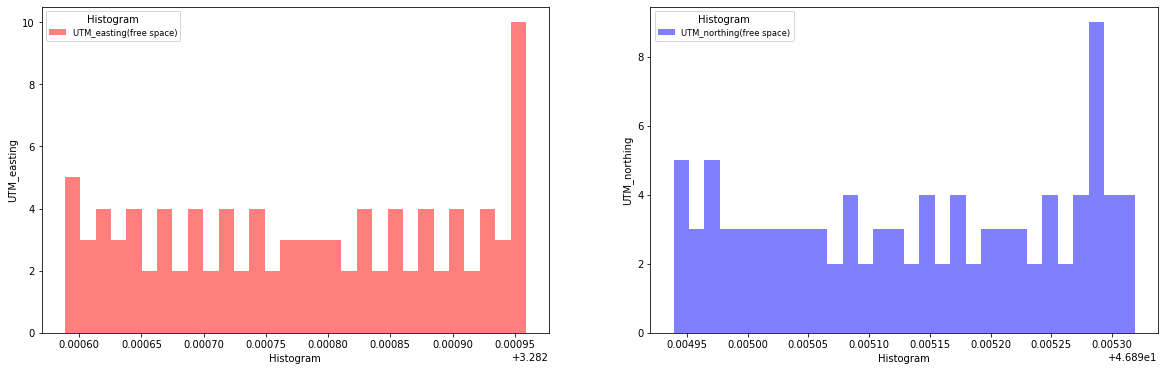

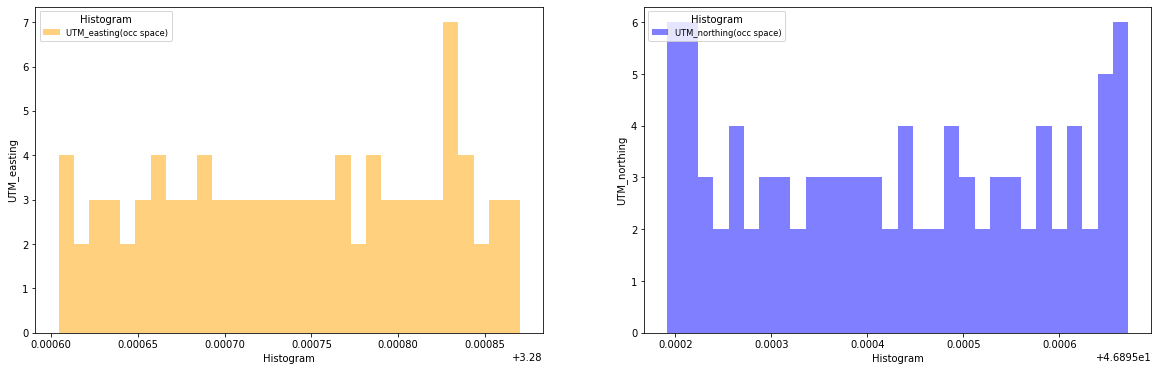

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

#for the walking data in the free spcae
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e, bins=30,color='red',alpha=0.5, label='UTM_easting(free space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing")
ax[1].hist(my_gps_data_utm_n, bins=30,color='blue',alpha=0.5, label='UTM_northing(free space)')
ax[0].legend(loc = 'upper left', title = 'Histogram',fontsize = 'small')
ax[1].legend(loc = 'upper left', title = 'Histogram',fontsize = 'small')

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
#for the walking data in the occ space
ax[0].set(xlabel="Histogram",ylabel="UTM_easting")
ax[0].hist(my_gps_data_utm_e1, bins=30,color='orange',alpha=0.5,label='UTM_easting(occ space)')
ax[1].set(xlabel="Histogram",ylabel="UTM_northing", label='UTM_northing(occ_space)')
ax[1].hist(my_gps_data_utm_n1, bins=30,color='blue',alpha=0.5,label='UTM_northing(occ space)')
ax[0].legend(loc = 'upper left', title = 'Histogram',fontsize = 'small')
ax[1].legend(loc = 'upper left', title = 'Histogram',fontsize = 'small')
plt.show()


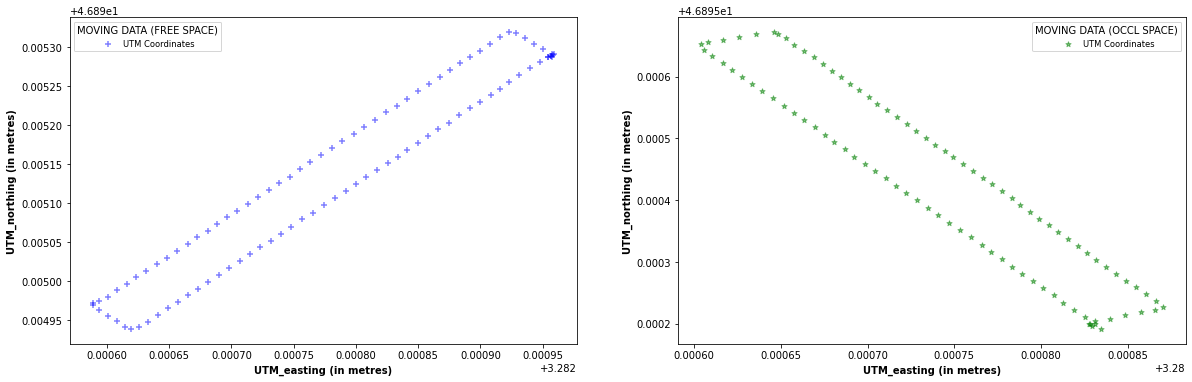

In [103]:
from matplotlib import markers
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(x = my_gps_data_utm_e, y= my_gps_data_utm_n , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates',marker = '+')
ax[0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0].xaxis.label.set_fontweight('bold')
ax[0].yaxis.label.set_fontweight('bold')

ax[1].scatter(x=my_gps_data_utm_e1, y = my_gps_data_utm_n1, s=30, alpha = 0.5,c = 'green',label = 'UTM Coordinates', marker = '*')
ax[1].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)")
ax[1].xaxis.label.set_fontweight('bold')
ax[1].yaxis.label.set_fontweight('bold')
# plt.axvline(x=9300, c="green")
# plt.axhline(y=8000, c="green")
ax[0].legend(loc = 'upper left', title = 'MOVING DATA (FREE SPACE)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'MOVING DATA (OCCL SPACE)',fontsize = 'small')
plt.show()

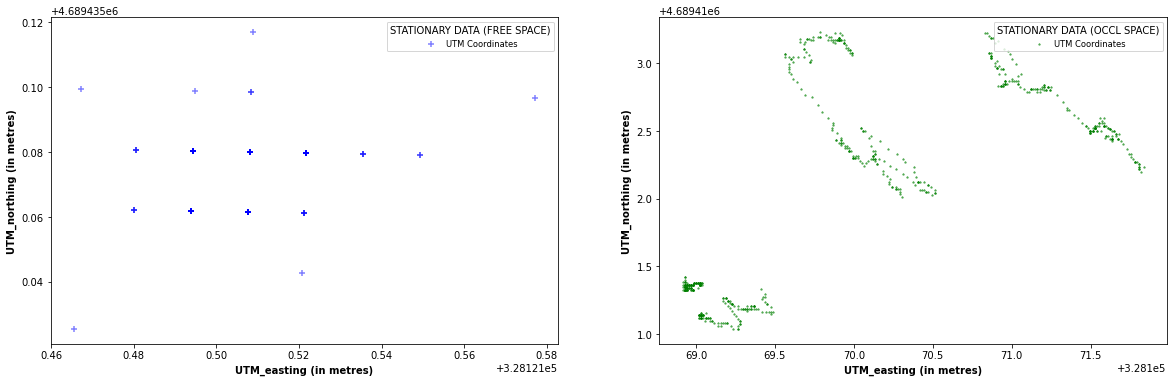

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(x = my_gps_data_utm_e2, y= my_gps_data_utm_n2 , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates',marker = '+')
ax[0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0].xaxis.label.set_fontweight('bold')
ax[0].yaxis.label.set_fontweight('bold')

ax[1].scatter(x=my_gps_data_utm_e3, y = my_gps_data_utm_n3, s=3, alpha = 0.5,c = 'green',label = 'UTM Coordinates', marker = '*')
ax[1].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)")
ax[1].xaxis.label.set_fontweight('bold')
ax[1].yaxis.label.set_fontweight('bold')

ax[0].legend(loc = 'upper right', title = 'STATIONARY DATA (FREE SPACE)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'STATIONARY DATA (OCCL SPACE)',fontsize = 'small')
plt.show()

In [108]:
df_statoccl['fix_quality'].mean()

4.806299212598425

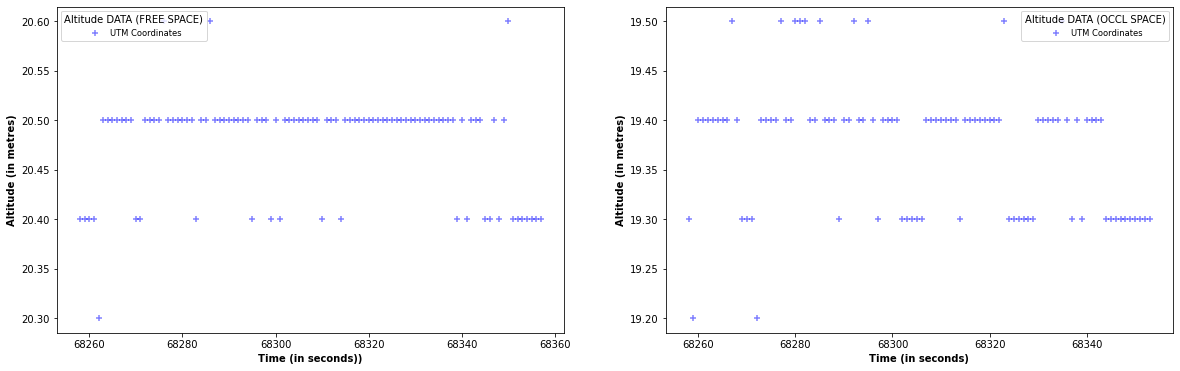

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(x = df_movefree['Header.stamp.secs'], y= df_movefree['Altitude'] , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates',marker = '+')
ax[0].set(xlabel="Time (in seconds))",ylabel="Altitude (in metres)")
ax[0].xaxis.label.set_fontweight('bold')
ax[0].yaxis.label.set_fontweight('bold')

ax[1].scatter(x = df_moveoccl['Header.stamp.secs'], y= df_moveoccl['Altitude'] , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates',marker = '+')
ax[1].set(xlabel="Time (in seconds)",ylabel="Altitude (in metres)")
ax[1].xaxis.label.set_fontweight('bold')
ax[1].yaxis.label.set_fontweight('bold')

ax[0].legend(loc = 'upper left', title = 'Altitude DATA (FREE SPACE)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'Altitude DATA (OCCL SPACE)',fontsize = 'small')
plt.show()

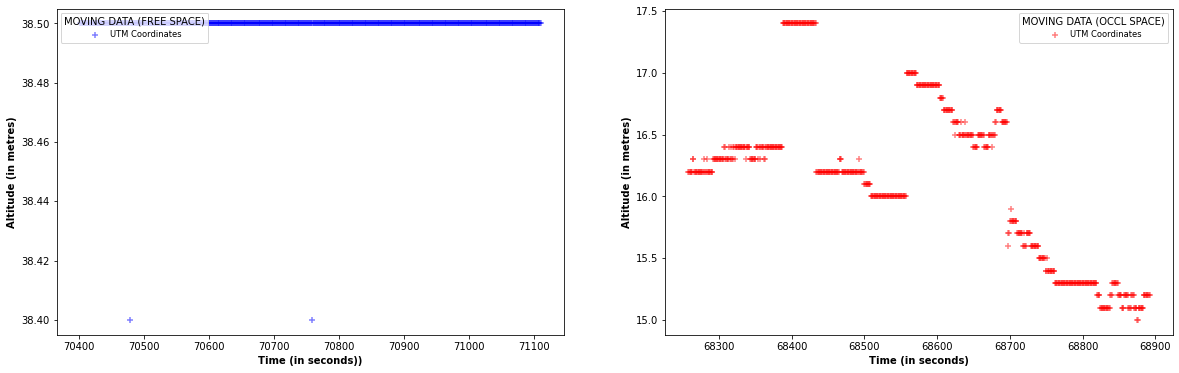

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(x = df_statfree['Header.stamp.secs'], y= df_statfree['Altitude'] , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates',marker = '+')
ax[0].set(xlabel="Time (in seconds))",ylabel="Altitude (in metres)")
ax[0].xaxis.label.set_fontweight('bold')
ax[0].yaxis.label.set_fontweight('bold')

ax[1].scatter(x = df_statoccl['Header.stamp.secs'], y= df_statoccl['Altitude'] , s=30, alpha = 0.5, c = 'red', label = 'UTM Coordinates',marker = '+')
ax[1].set(xlabel="Time (in seconds)",ylabel="Altitude (in metres)")
ax[1].xaxis.label.set_fontweight('bold')
ax[1].yaxis.label.set_fontweight('bold')

ax[0].legend(loc = 'upper left', title = 'MOVING DATA (FREE SPACE)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'MOVING DATA (OCCL SPACE)',fontsize = 'small')
plt.show()

In [236]:
i= UTM(lat_mine_2, long_mine_2)
print(i)

(328121.79105274694, 4689436.087683276)


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-189-c029b2c0f308>:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)


In [189]:
def UTM(latitude, longitude):
  wgs84 = pyproj.Proj("+init=EPSG:4326")
  zone = int((longitude + 180) / 6) + 1
  utm = pyproj.Proj(proj="utm", zone=zone, datum="WGS84")
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)

  return (x_coor, y_coor)

In [205]:
from sklearn.metrics import mean_squared_error
import math
#error analysis
lat_mine = 42.3380100
long_mine = -71.0858429

u = UTM(lat_mine, long_mine)
er_statoccl=[]
for i in range(len(df_statoccl['UTM_easting'])):
  xn = df_statoccl['UTM_easting'][i]
  yn = df_statoccl['UTM_northing'][i]
  er = math.sqrt((u[0] - xn)**2 + (u[1] - yn)**2)
  er_statoccl.append(er)

squared_errors = [error ** 2 for error in er_statoccl]
mse = sum(squared_errors) / len(squared_errors)
rmse = math.sqrt(mse)

print(er_statoccl)
print(rmse)

[1.851117868947295, 1.8512095271579387, 1.851117868947295, 1.851117868947295, 1.851117868947295, 1.851117868947295, 1.8512095271579387, 1.8696304160831112, 1.8697211676938732, 1.851117868947295, 1.851117868947295, 1.8696304160831112, 1.851117868947295, 1.8696304160831112, 1.851117868947295, 1.851128114642333, 1.851117868947295, 1.851128114642333, 1.851128114642333, 1.851117868947295, 1.8696304160831112, 1.851128114642333, 1.8696304160831112, 1.888153011453864, 1.8696304160831112, 1.8696304160831112, 1.8696304160831112, 1.8512402616161487, 1.8512402616161487, 1.8512402616161487, 1.8514542932205105, 1.8514542932205105, 1.8512402616161487, 1.8699635107099875, 1.8699635107099875, 1.8699635107099875, 1.8699635107099875, 1.8514542932205105, 1.8514542932205105, 1.8699635107099875, 1.8702762636477588, 1.8702762636477588, 1.8699635107099875, 1.8702762636477588, 1.8348380516814309, 1.8163482634303738, 1.8163482634303738, 1.8706898070278335, 1.8702762636477588, 1.9069821443609034, 1.9069821443609

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-189-c029b2c0f308>:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)


In [204]:
from sklearn.metrics import mean_squared_error
import math
#error analysis
lat_mine_2 = 42.3382053
long_mine_2 = -71.0864232
u2 = UTM(lat_mine_2, long_mine_2)

er_statfree=[]
for i in range(len(df_statfree['UTM_easting'])):
  xn = df_statfree['UTM_easting'][i]
  yn = df_statfree['UTM_northing'][i]
  er = math.sqrt((u2[0] - xn)**2 + (u2[1] - yn)**2)
  er_statfree.append(er)
  #print(er)

squared_errors = [error ** 2 for error in er_statfree]
mse = sum(squared_errors) / len(squared_errors)
rmse = math.sqrt(mse)

print(er_statfree)
print(rmse)

[1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.064640434012292, 1.0680547423529112, 1.0322928735829808, 1.0287598853302973, 1.010850569941966, 1.0287598853302973, 1.0538031096884024, 1.0466901930041286, 1.0501628622209631, 1.0680547423529112, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0680547423529112, 1.0501628622209631, 1.0680547423529112, 1.0501628622209631, 1.0716342135526693, 1.0680547423529112, 1.0680547423529112, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0680547423529112, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0716342135526693, 1.0716342135526693, 1.0680547423529112, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.0501628622209631, 1.050162862220

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-189-c029b2c0f308>:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)


9.813652617977287e-06

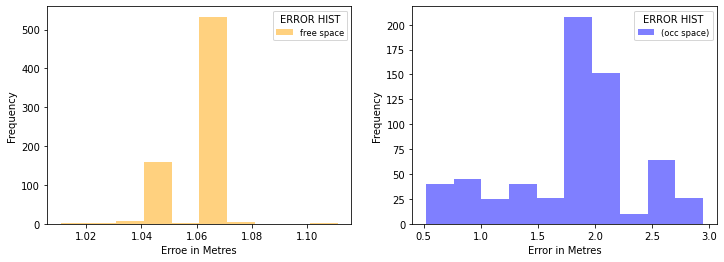

In [219]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#erroe histogram for statfree and statoccl
ax[0].set(xlabel="Erroe in Metres",ylabel="Frequency")
ax[0].hist(er_statfree,color='orange',alpha=0.5,label='free space')

ax[1].set(xlabel="Error in Metres",ylabel="Frequency", label='(FREE_space)')
ax[1].hist(er_statoccl,color='blue',alpha=0.5,label='(occ space)')
ax[0].legend(loc = 'upper right', title ='ERROR HIST',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'ERROR HIST',fontsize = 'small')
plt.show()

In [223]:
def find_median(numbers):
    numbers.sort()
    n = len(numbers)
    if n % 2 == 0:
        median = (numbers[n//2 - 1] + numbers[n//2]) / 2
    else:
        median = numbers[n//2]
    return median

numbers = er_statfree
numbers2 = er_statoccl
median1 = find_median(numbers)
median2 = find_median(numbers2)
print("Median:", median1, median2)

Median: 1.064640434012292 1.8903100999329157


In [255]:
fix = df_statoccl['fix_quality']
utm_north=[]
utm_east = []
utm_north1=[]
utm_east1 = []
utm_north2=[]
utm_east2 = []
index=[]
index2=[]
index3=[]
for i in range(len(fix)):
  if(fix[i]==5):
    s = i
    index.append(s)
  elif(fix[i]==4):
    s2 = i
    index2.append(s2)
  elif(fix[i]==2):
    s3 = i
    index3.append(s3)

for i in index:
  utm_east.append(df_statoccl['UTM_easting'][i])
  utm_north.append(df_statoccl['UTM_northing'][i])
for i in index2:
  utm_east1.append(df_statoccl['UTM_easting'][i])
  utm_north1.append(df_statoccl['UTM_northing'][i])
for i in index3:
  utm_east2.append(df_statoccl['UTM_easting'][i])
  utm_north2.append(df_statoccl['UTM_northing'][i])
print(len(index))
print(len(utm_east), len(utm_north))
print(utm_north, utm_east)

524
524 524
[4689411.360746224, 4689411.360409419, 4689411.323058491, 4689411.323058491, 4689411.323058491, 4689411.323058491, 4689411.323395295, 4689411.323058491, 4689411.360409419, 4689411.360746224, 4689411.361083029, 4689411.360409419, 4689411.360746224, 4689411.360746224, 4689411.360746224, 4689411.342239161, 4689411.341902357, 4689411.360746224, 4689411.361419833, 4689411.361083029, 4689411.361083029, 4689411.361083029, 4689411.360746224, 4689411.342575966, 4689411.342239161, 4689411.342239161, 4689411.341902357, 4689411.341902357, 4689411.323395295, 4689411.341902357, 4689411.323058491, 4689411.342575966, 4689411.380263699, 4689411.37959009, 4689411.361419833, 4689411.361083029, 4689411.361419833, 4689411.361756638, 4689411.379926895, 4689411.379926895, 4689411.361419833, 4689411.361419833, 4689411.361419833, 4689411.361419833, 4689411.379926895, 4689411.361419833, 4689411.342575966, 4689411.342912772, 4689411.342912772, 4689411.361419833, 4689411.343249576, 4689411.342912772, 

AttributeError: ignored

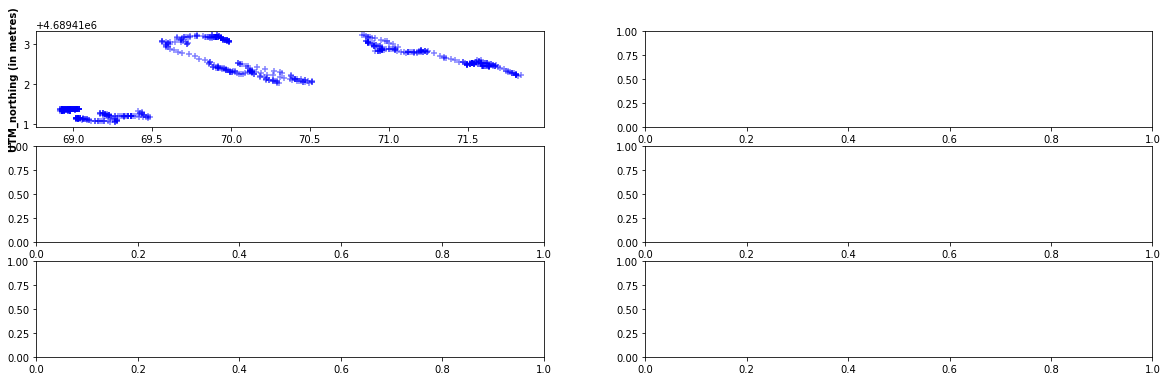

In [256]:
fig, ax = plt.subplots(3, 2, figsize=(20, 6))
ax[0,0].scatter(x = utm_east, y= utm_north , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates For fix qulaity(5)',marker = '+')
ax[0,0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0,0].xaxis.label.set_fontweight('bold')
ax[0,0].yaxis.label.set_fontweight('bold')
# ax[0,1].set(xlabel="Erroe in Metres",ylabel="Frequency")
# ax[0,1].hist(er_statfree,color='orange',alpha=0.5,label='free space')

ax[0,0].scatter(x = utm_east1, y= utm_north1 , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates For fix qulaity(4)',marker = '+')
ax[0,0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0,0].xaxis.label.set_fontweight('bold')
ax[0,0].yaxis.label.set_fontweight('bold')

ax[0,0].scatter(x = utm_east2, y= utm_north2 , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates For fix qulaity(4)',marker = '+')
ax[0,0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0,0].xaxis.label.set_fontweight('bold')
ax[0,0].yaxis.label.set_fontweight('bold')

ax[0].legend(loc = 'upper left', title = 'MOVING DATA (FREE SPACE)',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'MOVING DATA (OCCL SPACE)',fontsize = 'small')
plt.show()

In [270]:
from sklearn.metrics import mean_squared_error
import math
#error analysis
lat_mine = 42.3380100
long_mine = -71.0858429

u = UTM(lat_mine, long_mine)
er_statoccl=[]
er_statoccl1=[]
for i in range(len(utm_north)):
  xn = utm_east[i]
  yn = utm_north[i]
  er = math.sqrt((u[0] - xn)**2 + (u[1] - yn)**2)
  er_statoccl.append(er)

for i in range(len(utm_north1)):
  xn1 = utm_east1[i]
  yn1 = utm_north1[i]
  er1 = math.sqrt((u[0] - xn1)**2 + (u[1] - yn1)**2)
  er_statoccl1.append(er1)

squared_errors = [error ** 2 for error in er_statoccl]
mse = sum(squared_errors) / len(squared_errors)
rmse = math.sqrt(mse)

squared_errors1 = [error ** 2 for error in er_statoccl1]
mse1 = sum(squared_errors) / len(squared_errors)
rmse1 = math.sqrt(mse1)

print(rmse)
print(rmse1)

1.9148665026753953
1.9148665026753953


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-189-c029b2c0f308>:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_coor, y_coor = pyproj.transform(wgs84, utm, longitude, latitude)


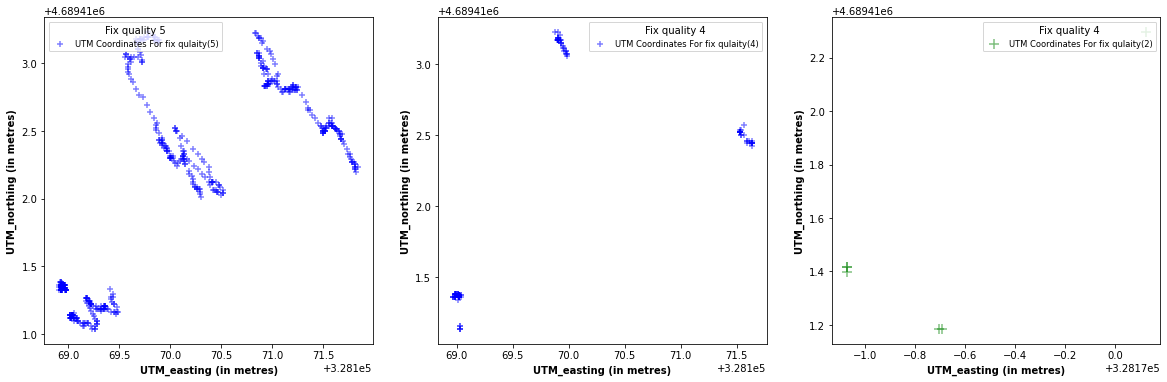

In [266]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(x = utm_east, y= utm_north , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates For fix qulaity(5)',marker = '+')
ax[0].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[0].xaxis.label.set_fontweight('bold')
ax[0].yaxis.label.set_fontweight('bold')
# ax[0,1].set(xlabel="Erroe in Metres",ylabel="Frequency")
# ax[0,1].hist(er_statfree,color='orange',alpha=0.5,label='free space')

ax[1].scatter(x = utm_east1, y= utm_north1 , s=30, alpha = 0.5, c = 'blue', label = 'UTM Coordinates For fix qulaity(4)',marker = '+')
ax[1].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[1].xaxis.label.set_fontweight('bold')
ax[1].yaxis.label.set_fontweight('bold')

ax[2].scatter(x = utm_east2, y= utm_north2 , s=100, alpha = 0.5, c = 'green', label = 'UTM Coordinates For fix qulaity(2)',marker = '+')
ax[2].set(xlabel="UTM_easting (in metres)",ylabel="UTM_northing (in metres)",)
ax[2].xaxis.label.set_fontweight('bold')
ax[2].yaxis.label.set_fontweight('bold')

ax[0].legend(loc = 'upper left', title = 'Fix quality 5',fontsize = 'small')
ax[1].legend(loc = 'upper right', title = 'Fix quality 4',fontsize = 'small')
ax[2].legend(loc = 'upper right', title = 'Fix quality 4',fontsize = 'small')

3.0977022571020836e-05
[[0.9826171]] [43.66941878]


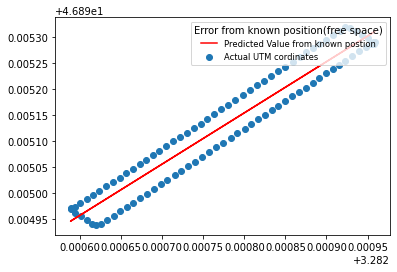

In [278]:
from prompt_toolkit.shortcuts.dialogs import Label
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = my_gps_data_utm_e.reshape(-1,1)
y = my_gps_data_utm_n.reshape(-1,1)

# Fit a line to the data using linear regression
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
# print(y_pred)
residuals = np.array(y_pred) - np.array(y)
# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(rmse)
# Plot the scatter plot and the line of best fit
print(reg.coef_,reg.intercept_)
plt.scatter(x, y, label = 'Actual UTM cordinates')

plt.plot(x, reg.predict(x), color='red',label = 'Predicted Value from known postion')
plt.legend(loc = 'upper right', title = 'Error from known position(free space)',fontsize = 'small')
plt.show()